<center><h1>Resume Recommendation<h1><center>

## Importing Libraries

In [30]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


## 1. Data Collection

In [31]:
df = pd.read_excel("dataset_it.xlsx")

In [32]:
df.shape

(652, 8)

In [33]:
df.head()

,name,age,versity,subject,last_company,experience,salary,matching_rate
0,Farzana afroz,27.9,Jahangirnagar University,Masters of Science (MSc),Exelsior Trading Corporation,3,25000,100
1,Md Masud Rana,29.8,University of Information Technology & Science,Electrical and Electronic Engineering,Genesis Technology Limited,9,40000,100
2,Asif Ahmed Nadim,27.2,Ahsanullah University of Science and Technology,Bachelor of Science (BSc),Spring Rain Ltd.,5,25000,100
3,Md Saiful Islam Tuhin,28.1,"BGC Trust University Bangladesh, Chittagong",Bachelor of Science (BSc),Gardenia Wears Ltd,3,30000,100
4,Md. Mostafa Kamal,26.0,World University of Bangladesh,B.Sc,Global Brand (Prvt.) Bangladesh limited,4,16000,100


## 2. Data Exploration

### Find out freashers and job holders

In [34]:
def save():
    df.to_excel('current.xlsx', index=False)

In [35]:
def filterFresher(row):
    return 'fresher' if row.experience == 0 else 'jobHolder'
#     return 1 if row.experience == 0 else 0

In [36]:
df['fresher'] = df.apply(lambda row: filterFresher(row), axis=1)
df.head()

,name,age,versity,subject,last_company,experience,salary,matching_rate,fresher
0,Farzana afroz,27.9,Jahangirnagar University,Masters of Science (MSc),Exelsior Trading Corporation,3,25000,100,jobHolder
1,Md Masud Rana,29.8,University of Information Technology & Science,Electrical and Electronic Engineering,Genesis Technology Limited,9,40000,100,jobHolder
2,Asif Ahmed Nadim,27.2,Ahsanullah University of Science and Technology,Bachelor of Science (BSc),Spring Rain Ltd.,5,25000,100,jobHolder
3,Md Saiful Islam Tuhin,28.1,"BGC Trust University Bangladesh, Chittagong",Bachelor of Science (BSc),Gardenia Wears Ltd,3,30000,100,jobHolder
4,Md. Mostafa Kamal,26.0,World University of Bangladesh,B.Sc,Global Brand (Prvt.) Bangladesh limited,4,16000,100,jobHolder


In [37]:
def categorizeSubject(row):
    found = re.search(".*(?i)([bm] ?\.? ?sc|Computer|Science).*", row.subject) 
    return 0 if not found else 1

In [38]:
df['engineer'] = df.apply(lambda row: categorizeSubject(row), axis=1)
df.head()

,name,age,versity,subject,last_company,experience,salary,matching_rate,fresher,engineer
0,Farzana afroz,27.9,Jahangirnagar University,Masters of Science (MSc),Exelsior Trading Corporation,3,25000,100,jobHolder,1
1,Md Masud Rana,29.8,University of Information Technology & Science,Electrical and Electronic Engineering,Genesis Technology Limited,9,40000,100,jobHolder,0
2,Asif Ahmed Nadim,27.2,Ahsanullah University of Science and Technology,Bachelor of Science (BSc),Spring Rain Ltd.,5,25000,100,jobHolder,1
3,Md Saiful Islam Tuhin,28.1,"BGC Trust University Bangladesh, Chittagong",Bachelor of Science (BSc),Gardenia Wears Ltd,3,30000,100,jobHolder,1
4,Md. Mostafa Kamal,26.0,World University of Bangladesh,B.Sc,Global Brand (Prvt.) Bangladesh limited,4,16000,100,jobHolder,1


### Data Visualization

In [39]:
df.isna().sum()

name              0
age               0
versity           0
subject           0
last_company     47
experience        0
salary            0
matching_rate     0
fresher           0
engineer          0
dtype: int64

In [40]:
df.dtypes

name              object
age              float64
versity           object
subject           object
last_company      object
experience         int64
salary             int64
matching_rate      int64
fresher           object
engineer           int64
dtype: object

In [41]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_col = df.select_dtypes(include=numerics).columns.tolist()
numerical_col

['age', 'experience', 'salary', 'matching_rate', 'engineer']

<Figure size 432x288 with 0 Axes>

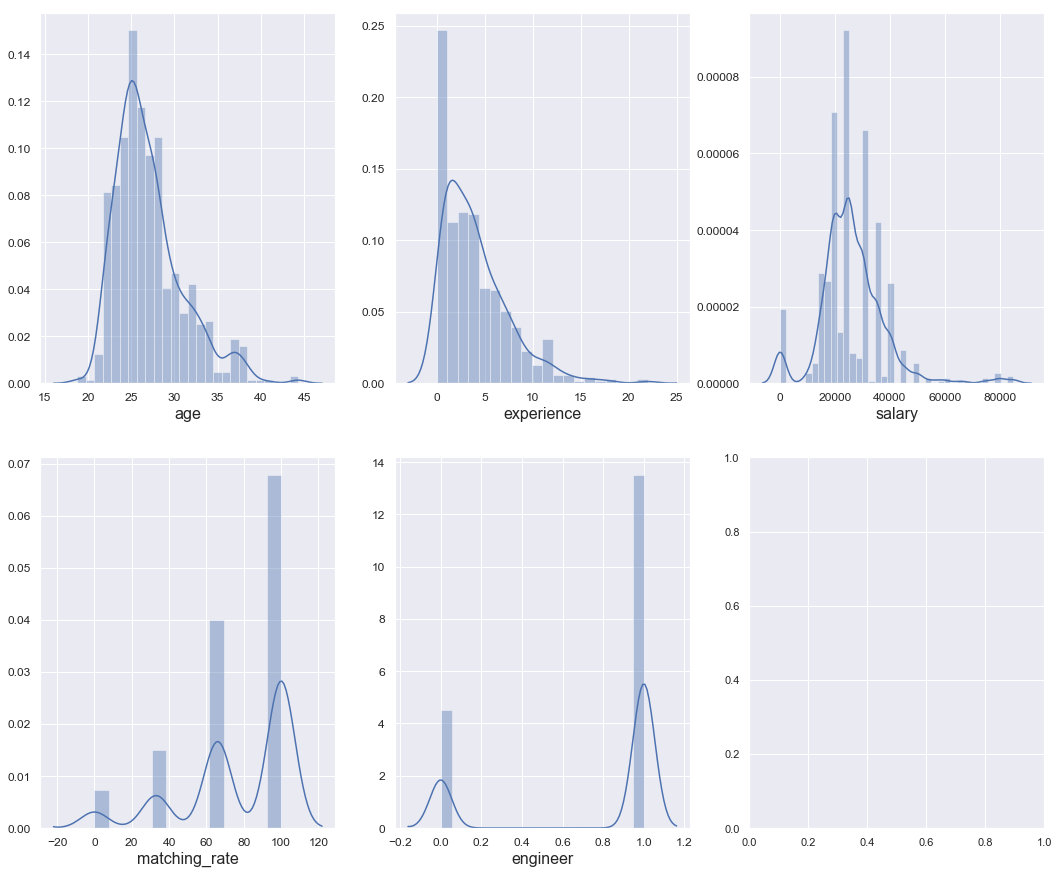

In [42]:
def plot_distribution(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,15))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.distplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_distribution(df, numerical_col)

<Figure size 432x288 with 0 Axes>

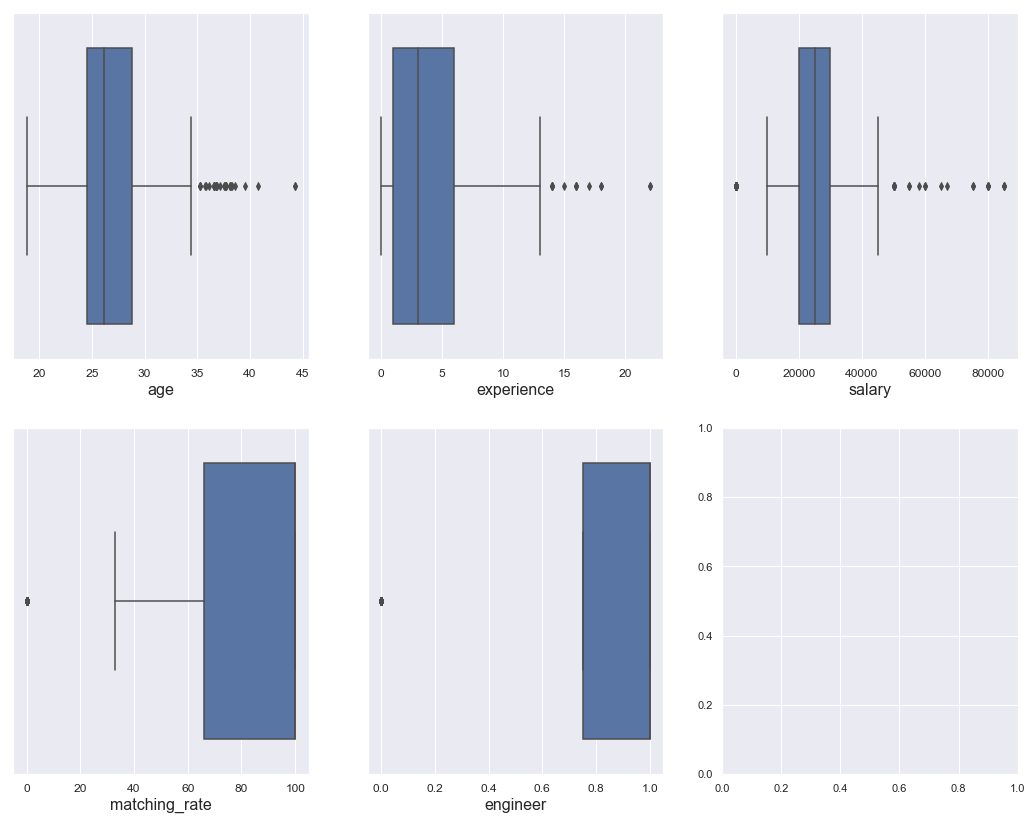

In [43]:
def plot_boxplot(data, features):
    i = 0
    plt.figure()
    col = 3
    row = int(np.ceil(len(features)/col))
    fig, ax = plt.subplots(row,col,figsize=(18,14))

    for feature in features:
        i += 1
        plt.subplot(row,col,i);
        sns.boxplot(tuple(data[feature]))
        plt.xlabel(feature, fontsize=16)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=12)
        plt.tick_params(axis='y', which='major', labelsize=12)
    plt.show();
    
plot_boxplot(df, numerical_col)

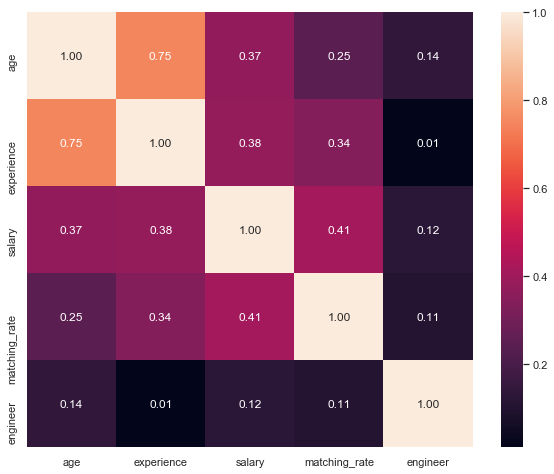

In [46]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(corr, 
            xticklabels = corr.columns.values,
            yticklabels = corr.columns.values,
            annot = True, fmt = '.2f')

In [48]:
def detect_outlier(feature):
    Q1 = feature.quantile(0.25)
    Q3 = feature.quantile(0.75)
    
    IQR = Q3-Q1
    
    lower_bound = Q1-(1.5*IQR)
    upper_bound = Q3+(1.5*IQR)
    
    return feature.index[(feature<lower_bound)|(feature>upper_bound)].tolist()
    
for col in numerical_col:
    print(col,'-->',detect_outlier(df[col]))   

age --> [5, 10, 16, 17, 19, 21, 47, 57, 69, 110, 132, 161, 181, 190, 210, 211, 242, 243, 253, 280, 284, 289, 313, 337, 414, 417, 434, 464, 528, 545, 592, 638, 647]
experience --> [5, 130, 132, 210, 242, 243, 284, 289, 322, 417, 507, 545, 592]
salary --> [21, 23, 45, 47, 53, 57, 60, 92, 132, 142, 160, 184, 190, 207, 218, 242, 273, 289, 313, 317, 434, 451, 470, 491, 545, 575, 601, 617, 618, 619, 621, 622, 623, 625, 626, 627, 630, 633, 634, 635, 637, 638, 639, 640, 641, 644, 645, 646, 647, 648, 649, 650, 651]
matching_rate --> [615, 616, 617, 618, 619, 620, 621, 622, 623, 624, 625, 626, 627, 628, 629, 630, 631, 632, 633, 634, 635, 636, 637, 638, 639, 640, 641, 642, 643, 644, 645, 646, 647, 648, 649, 650, 651]
engineer --> [1, 14, 15, 20, 22, 30, 43, 52, 58, 65, 71, 72, 80, 85, 91, 93, 95, 98, 99, 102, 103, 108, 114, 117, 119, 122, 126, 130, 132, 137, 139, 150, 151, 155, 157, 164, 165, 166, 169, 183, 184, 186, 191, 214, 216, 218, 219, 229, 242, 246, 254, 262, 264, 266, 267, 268, 271, 282, 

In [ ]:
for col in numerical_col:
    indx = detect_outlier(data[col])
    df[col].loc[indx] = df[col].median()

## 3. Data Preprocessing

## 4. Data Modeling

## 5. Data Validation

## 6. Data Communication